In [11]:
import os
import numpy as np
import pandas as pd
import lightgbm as lgb
import shap
import statsmodels.stats.multitest as multi
from scipy.stats import pearsonr
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal
from matplotlib.ticker import MaxNLocator

In [4]:
input_path = "/BioII/lulab_b/huangkeyun/zhangys/RNA_locator/circExor/models/saved_models/circRNA_ML_Model_Output/"
lightGBM_path = os.path.join(input_path,"LightGBM")
output_path = "/BioII/lulab_b/huangkeyun/zhangys/RNA_locator/python_scripts/SHAP/circRNA_shap_output"
if not (os.path.exists(output_path)):
    os.mkdir(output_path)

# load kmer file
df_kmer_345 = pd.read_csv(os.path.join(input_path,"df_kmer345_freq.tsv"),sep='\t',index_col= 0)
transcript_id = df_kmer_345['RNA_Symbol']
# convert to x:kmer-freq , y:label
del df_kmer_345['RNA_Symbol']
x_kmer = df_kmer_345.values
y_kmer = np.array(df_kmer_345.index)

# load model
circExor = joblib.load(os.path.join(lightGBM_path,"best_LightGBM_model.pkl"))

/BioII/lulab_b/huangkeyun/miniconda/lib/python3.10/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.4.1.post1 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [5]:
df_kmer_345.columns

Index(['AAA', 'AAC', 'AAG', 'AAT', 'ACA', 'ACC', 'ACG', 'ACT', 'AGA', 'AGC',
       ...
       'TTTCG', 'TTTCT', 'TTTGA', 'TTTGC', 'TTTGG', 'TTTGT', 'TTTTA', 'TTTTC',
       'TTTTG', 'TTTTT'],
      dtype='object', length=1344)

In [6]:
shap.initjs() 
# Interpret the model's predictions on the entire dataset for nuclear/cytosol localization 
circExor_explainer = shap.TreeExplainer(circExor)

shap_values_circExor = circExor_explainer.shap_values(df_kmer_345)

# Convert np.array to dataframe with column names
shap_df = pd.DataFrame(shap_values_circExor,columns = df_kmer_345.columns)
shap_df.index = transcript_id 
shap_df.to_csv(os.path.join(output_path,"circRNA_shap_df.txt"),sep='\t')

# Mean(abs(shap_value))
mean_abs_shap_val = shap_df.apply(lambda x:abs(x).mean(),axis=0)

/BioII/lulab_b/huangkeyun/miniconda/lib/python3.10/site-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


In [7]:
mean_abs_shap_val 

AAA      0.038855
AAC      0.059427
AAG      0.054567
AAT      0.053620
ACA      0.039691
           ...   
TTTGT    0.047631
TTTTA    0.018986
TTTTC    0.012936
TTTTG    0.026090
TTTTT    0.022606
Length: 1344, dtype: float64

In [9]:
# Calculate pearson correlation
lnc_num = shap_df.shape[0]
total_df = pd.concat([df_kmer_345,shap_df])
total_df

,AAA,AAC,AAG,AAT,ACA,ACC,ACG,ACT,AGA,AGC,...,TTTCG,TTTCT,TTTGA,TTTGC,TTTGG,TTTGT,TTTTA,TTTTC,TTTTG,TTTTT
0,0.007519,0.002506,0.017544,0.002506,0.007519,0.006266,0.002506,0.003759,0.010025,0.013784,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001253,0.000000,0.000000
0,0.006176,0.004751,0.009501,0.008076,0.008551,0.003325,0.001425,0.005226,0.009501,0.007601,...,0.000000,0.000000,0.000000,0.000475,0.000950,0.000475,0.000475,0.000000,0.001425,0.000000
0,0.004640,0.006961,0.010441,0.002320,0.009281,0.004640,0.002320,0.005800,0.005800,0.010441,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0,0.007463,0.001493,0.010448,0.010448,0.004478,0.007463,0.001493,0.002985,0.010448,0.013433,...,0.000000,0.000000,0.000000,0.000000,0.001493,0.000000,0.002985,0.000000,0.000000,0.001493
0,0.002030,0.006428,0.004060,0.003383,0.009811,0.011502,0.000677,0.005413,0.002706,0.009811,...,0.000000,0.000677,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hsa_circ_0006393,-0.042559,-0.026820,-0.027478,0.000163,-0.028734,-0.053346,0.076253,-0.015277,-0.029059,0.137394,...,0.004760,0.004837,0.338473,-0.115100,0.108250,0.053335,0.070356,-0.020067,-0.053426,0.005062
hsa_circ_0000350,0.005944,-0.095105,-0.020503,-0.013930,0.012333,-0.055579,-0.015000,0.025040,-0.070749,-0.105659,...,0.004133,-0.017299,-0.050172,0.012302,-0.028910,0.002026,0.011189,0.008355,0.014370,0.068851
hsa_circ_0072995,-0.009682,-0.055718,0.014289,-0.037205,0.032032,0.033398,0.013862,0.003602,0.002293,-0.146353,...,0.004734,0.006329,-0.035208,0.009854,0.088027,-0.010235,-0.025281,-0.034666,-0.051782,-0.026107
hsa_circ_0001461,0.022691,0.006593,-0.027228,0.071324,-0.052589,-0.002497,-0.025642,0.021616,-0.042990,-0.016913,...,0.004728,-0.019722,-0.020425,0.008131,-0.037292,-0.054704,0.005138,-0.015779,-0.089095,0.008976


In [10]:
# Pearson correlation coefficient (r and p_value)
total_df = total_df.replace([np.inf, -np.inf], np.nan)
total_df = total_df.fillna(total_df.mean())
pearsonr_r = total_df.apply(lambda x:pearsonr(x[:lnc_num],x[lnc_num:2*lnc_num])[0],axis=0)
pearsonr_p = total_df.apply(lambda x:pearsonr(x[:lnc_num],x[lnc_num:2*lnc_num])[1],axis=0)
fdr =pd.Series(multi.multipletests(pearsonr_p)[1],index = pearsonr_p.index)

# Merge to kmer_info ["mean_abs_shap","pearsonr_r","pearsonr_p","fdr"]
kmer_info_df = pd.concat([mean_abs_shap_val,pearsonr_r,pearsonr_p,fdr],axis=1) 
kmer_info_df.columns = ["mean_abs_shap","pearsonr_r","pearsonr_p","fdr"]

kmer_info_df.to_csv(os.path.join(output_path,"kmer_importance_quantification_info.txt"),sep='\t')

/tmp/ipykernel_127444/3429575329.py:4: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearsonr_r = total_df.apply(lambda x:pearsonr(x[:lnc_num],x[lnc_num:2*lnc_num])[0],axis=0)
/tmp/ipykernel_127444/3429575329.py:5: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearsonr_p = total_df.apply(lambda x:pearsonr(x[:lnc_num],x[lnc_num:2*lnc_num])[1],axis=0)


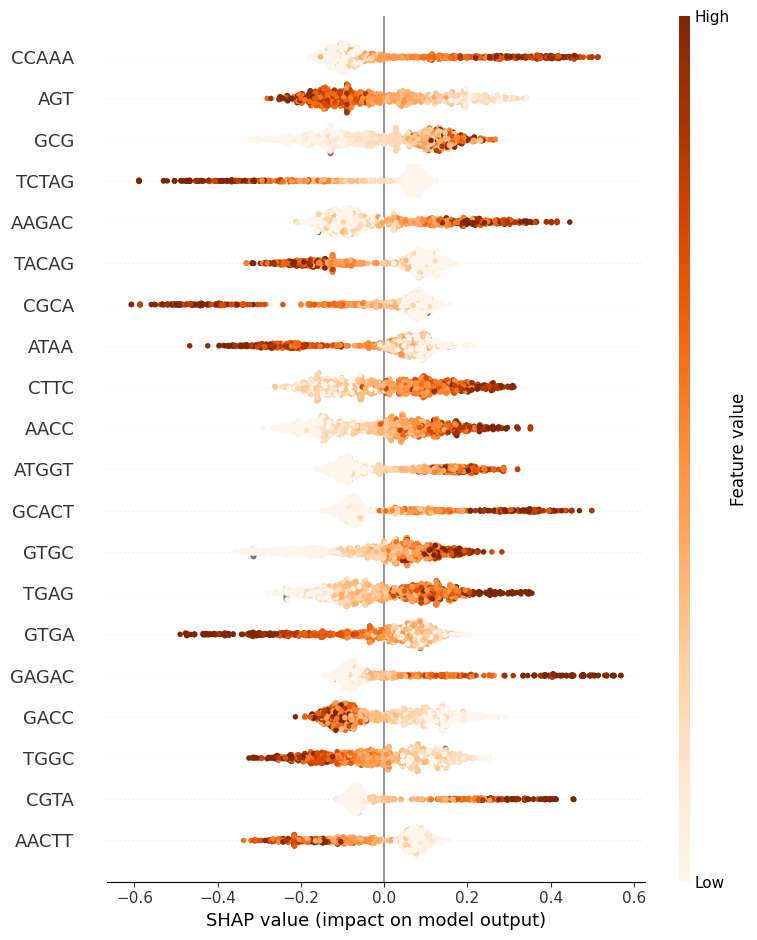

In [31]:
# Define colormap
# my_colormap= plt.get_cmap("RdYlBu")
my_colormap= plt.get_cmap("Oranges")

# Plot the summary without showing it
plt.figure(figsize=(9, 20))
shap.summary_plot(shap_values_circExor,features =df_kmer_345,max_display = 20,show=False)

# Change the colormap of the artists
for fc in plt.gcf().get_children():
    for fcc in fc.get_children():
        if hasattr(fcc, "set_cmap"):
            fcc.set_cmap(my_colormap)
plt.savefig(os.path.join(output_path,"SHAP_total_top20_kmer.pdf"), format='pdf', dpi=1200)
plt.show()

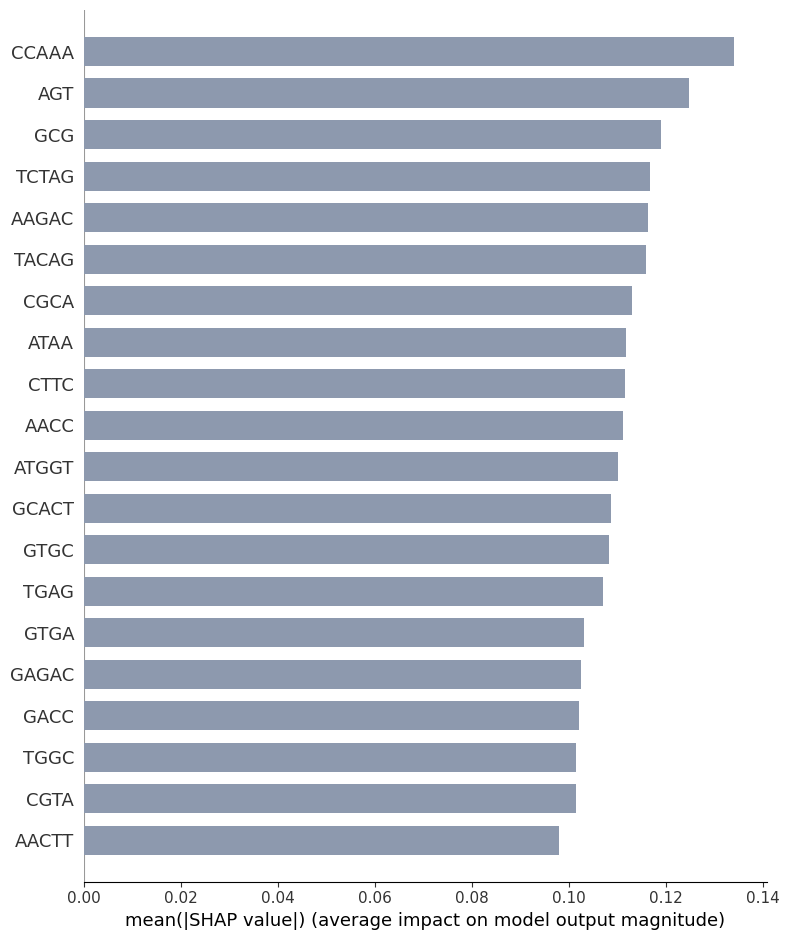

In [32]:
plt.figure(figsize=(9, 20))
shap.summary_plot(shap_values_circExor,df_kmer_345,plot_type = "bar",max_display = 20,color = "#8d99ae",show = False)
plt.savefig(os.path.join(output_path,"SHAP_total_top10_kmer_bar.pdf"), format='pdf', dpi=1200)
plt.show()

/tmp/ipykernel_127444/2618207517.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='mean_abs_shap', y='kmer_length', data=df, orient='h', palette=chosen_color)


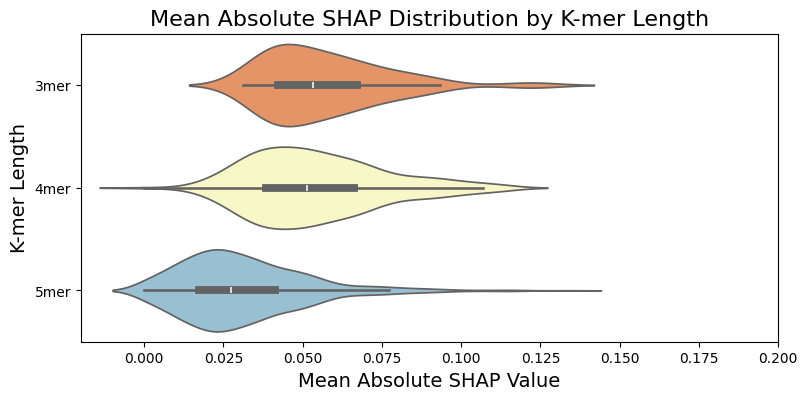

0.2767812042697733 1.2373050417368655e-52 2.9755835722497285e-21


In [ ]:
# 比较3mer,4mer,5mer在abs(SHAP)上有无显著差异
abs_shape_3mer = mean_abs_shap_val[0:64]
abs_shape_4mer = mean_abs_shap_val[64:64+256]
abs_shape_5mer = mean_abs_shap_val[64+256:64+256+1024]

# 按k-mer长度（3mer, 4mer, 5mer）分组
data_3mer = mean_abs_shap_val[mean_abs_shap_val.index.str.len() == 3]
data_4mer = mean_abs_shap_val[mean_abs_shap_val.index.str.len() == 4]
data_5mer = mean_abs_shap_val[mean_abs_shap_val.index.str.len() == 5]
df = pd.DataFrame({
    'mean_abs_shap': pd.concat([data_3mer, data_4mer, data_5mer]),
    'kmer_length': ['3mer'] * len(data_3mer) + ['4mer'] * len(data_4mer) + ['5mer'] * len(data_5mer)
})

color_schemes = [
    "coolwarm",       # 热冷配色
    "Spectral",       # 光谱配色
    "Set2",           # 适合分类数据
    "RdBu_r",         # 红蓝配色（反转）
    "viridis",        # Viridis色阶（渐变色）
    "plasma",         # Plasma色阶（渐变色）
    "cividis",        # Cividis色阶（渐变色，适合色盲人群）
    "Blues",          # 蓝色渐变
    "RdYlBu",         # 红黄蓝色系
    "BrBG",           # Brown-Blue-Green
]

chosen_color = "RdYlBu"

plt.figure(figsize=(9, 4))
sns.violinplot(x='mean_abs_shap', y='kmer_length', data=df, orient='h', palette=chosen_color)
plt.title('Mean Absolute SHAP Distribution by K-mer Length', fontsize=16)
plt.xlabel('Mean Absolute SHAP Value', fontsize=14)
plt.ylabel('K-mer Length', fontsize=14)
plt.xlim(-0.02,0.2)

plt.savefig('mean_abs_shap_violin_plot.pdf', format='pdf', dpi=1200)

plt.show()

# 两两kruskal检验
stat_34, p_value_34 = kruskal(data_3mer, data_4mer)
stat_45, p_value_45 = kruskal(data_4mer, data_5mer)
stat_35, p_value_35 = kruskal(data_3mer, data_5mer)
print(p_value_34,p_value_45, p_value_35)

In [ ]:
TOP20_SHAP_kmer = kmer_info_df.sort_values(by = 'mean_abs_shap', ascending=False).head(n = 20)

# kmer_info_df['abs_pearsonr'] = kmer_info_df['pearsonr_r'].abs()
# TOP20_pearsonr_kmer = kmer_info_df.sort_values(by = 'abs_pearsonr', ascending=False).head(n = 20)
# common_index = TOP20_SHAP_kmer.index.intersection(TOP20_pearsonr_kmer.index)
# common_index

In [49]:
LESS20_SHAP_kmer = kmer_info_df.sort_values(by = 'mean_abs_shap', ascending=True).head(n = 20)
LESS20_pearsonr_kmer = kmer_info_df.sort_values(by = 'abs_pearsonr', ascending=True).head(n = 20)
LESS20_SHAP_kmer

,mean_abs_shap,pearsonr_r,pearsonr_p,fdr,abs_pearsonr
CGCAT,0.0,NaN,NaN,NaN,NaN
CGTTA,0.0,NaN,NaN,NaN,NaN
CCGCT,0.0,NaN,NaN,NaN,NaN
TAGGT,0.0,NaN,NaN,NaN,NaN
GCGAT,0.0,NaN,NaN,NaN,NaN
CGCG,0.0,NaN,NaN,NaN,NaN
GCGGT,0.0,NaN,NaN,NaN,NaN
CGTAG,0.0,NaN,NaN,NaN,NaN
GCGCT,0.0,NaN,NaN,NaN,NaN
CGACG,0.0,NaN,NaN,NaN,NaN


In [ ]:
TOP20_SHAP_kmer[(TOP20_SHAP_kmer['pearsonr_r'] < 0)]
TOP20_SHAP_kmer[(TOP20_SHAP_kmer['pearsonr_r'] > 0)]

,mean_abs_shap,pearsonr_r,pearsonr_p,fdr
AGT,0.124861,-0.843510,0.000000e+00,0.000000e+00
TCTAG,0.116744,-0.747884,1.911743e-231,2.139241e-228
TACAG,0.115835,-0.769467,4.686009e-253,5.435770e-250
CGCA,0.113087,-0.896122,0.000000e+00,0.000000e+00
ATAA,0.111880,-0.806697,1.627765e-296,2.011918e-293
GTGA,0.103136,-0.834388,0.000000e+00,0.000000e+00
GACC,0.102174,-0.745400,4.241528e-229,4.720820e-226
TGGC,0.101540,-0.851539,0.000000e+00,0.000000e+00
AACTT,0.098020,-0.760886,3.448829e-244,3.942011e-241
